## Importing necessary libraries & dataset

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [12]:
df = pd.read_csv("D:\ds portoflio\OECD Alcohol Consumption per Capita.csv")
df

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,LITRES/CAPITA,Flag Codes
0,0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN
...,...,...,...,...,...,...,...,...,...
2746,2746,ROU,ALCOHOL,TOT,LT_CAP15,A,2015,9.5,NaN
2747,2747,ROU,ALCOHOL,TOT,LT_CAP15,A,2016,9.6,NaN
2748,2748,ROU,ALCOHOL,TOT,LT_CAP15,A,2017,10.1,NaN
2749,2749,ROU,ALCOHOL,TOT,LT_CAP15,A,2018,11.0,NaN


## Data Cleaning & Preliminary Analysis

In [13]:
df.dtypes

index              int64
LOCATION          object
INDICATOR         object
SUBJECT           object
MEASURE           object
FREQUENCY         object
TIME               int64
LITRES/CAPITA    float64
Flag Codes        object
dtype: object

- Checking to see if the columns have variable values, if not they should be eliminated (irrelevant)

In [14]:
pd.unique(df['INDICATOR'])

array(['ALCOHOL'], dtype=object)

In [15]:
pd.unique(df['SUBJECT'])

array(['TOT'], dtype=object)

In [16]:
pd.unique(df['MEASURE'])

array(['LT_CAP15'], dtype=object)

In [17]:
pd.unique(df['FREQUENCY'])

array(['A'], dtype=object)

In [18]:
pd.unique(df['Flag Codes'])

array([nan, 'B', 'D', 'E', 'P'], dtype=object)

 - the index was also dropped because the pandas data type includes it automatically

In [22]:
df.drop(['index', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY'], axis = 1)

,LOCATION,TIME,LITRES/CAPITA,Flag Codes
0,AUS,1960,9.3,NaN
1,AUS,1961,9.4,NaN
2,AUS,1962,9.5,NaN
3,AUS,1963,9.8,NaN
4,AUS,1964,10.1,NaN
...,...,...,...,...
2746,ROU,2015,9.5,NaN
2747,ROU,2016,9.6,NaN
2748,ROU,2017,10.1,NaN
2749,ROU,2018,11.0,NaN


 - the remaining dataset contains 4 columns instead of 9, a significant improvements when considering more observations

In [39]:
avg_litre_percap = df.groupby('LOCATION')['LITRES/CAPITA'].mean().sort_values(ascending = False)
avg_litre_percap

LOCATION
RUS    16.796296
FRA    15.832692
LUX    15.147458
PRT    13.952542
DEU    13.583051
ESP    13.190000
ITA    12.698305
AUT    12.650000
SVN    12.534146
ARG    12.283051
HUN    12.066129
CHE    11.835484
LTU    11.829630
CZE    11.661905
HRV    11.612121
BEL    11.568421
SVK    11.541935
DNK    11.225862
AUS    10.881034
EST    10.565625
KOR    10.047541
BGR    10.038596
IRL    10.017460
NZL     9.803636
LVA     9.666667
GRC     9.577193
ROU     9.457627
GBR     9.340984
NLD     9.087097
POL     9.055738
USA     9.027419
CHL     8.663158
CAN     8.614286
ZAF     7.977966
FIN     7.764516
JPN     7.388136
SWE     6.595161
PER     5.576271
ISL     5.571667
NOR     5.360317
COL     5.062712
BRA     4.873684
MEX     4.281967
CRI     4.261290
ISR     3.120339
CHN     2.877966
IND     1.530508
TUR     1.429032
IDN     0.084746
Name: LITRES/CAPITA, dtype: float64

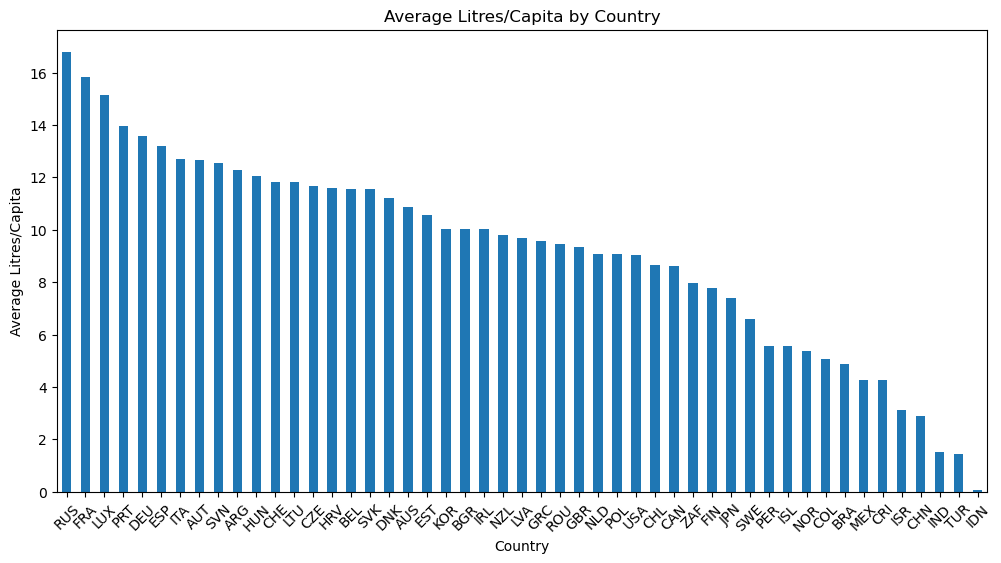

In [40]:
plt.figure(figsize=(12, 6))
avg_litre_percap.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Litres/Capita')
plt.title('Average Litres/Capita by Country')
plt.xticks(rotation=45)
plt.show()

Dropdown(description='Country:', options=('ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN'…

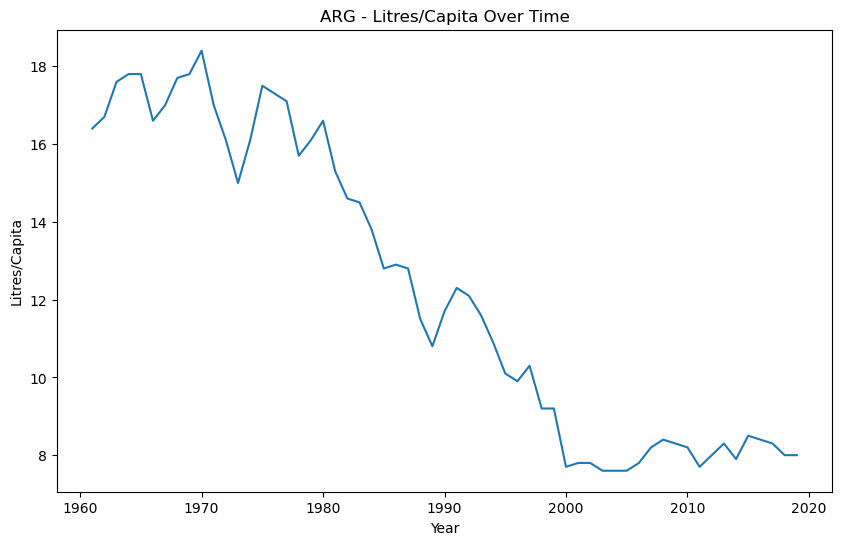

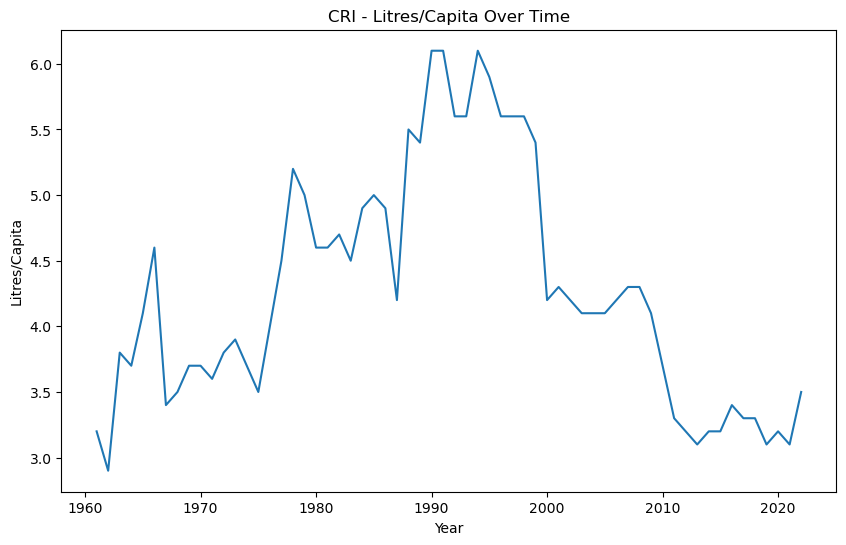

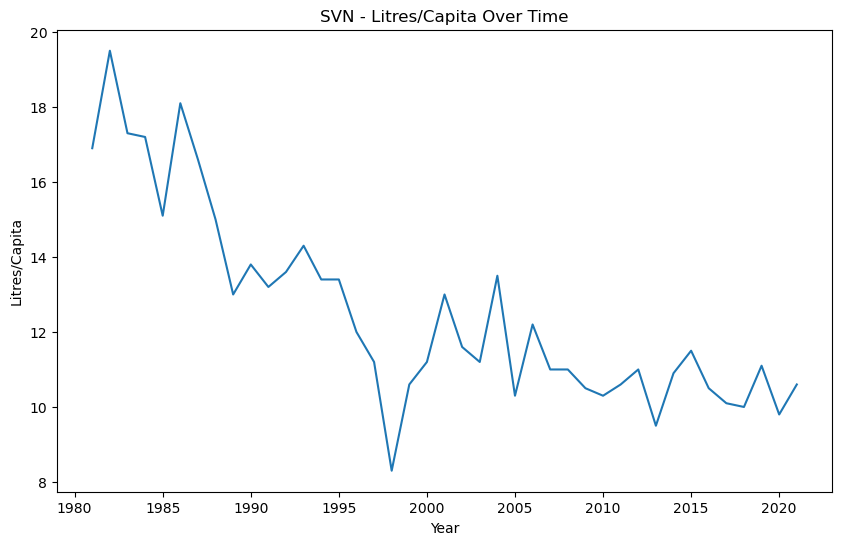

In [48]:
avg_liters_by_country_year = df.groupby(['LOCATION', 'TIME'])['LITRES/CAPITA'].mean().reset_index()

def plot_country_evolution(country):
    plt.figure(figsize=(10, 6))
    data = avg_liters_by_country_year[avg_liters_by_country_year['LOCATION'] == country]
    plt.plot(data['TIME'], data['LITRES/CAPITA'])
    plt.xlabel('Year')
    plt.ylabel('Litres/Capita')
    plt.title(f'{country} - Litres/Capita Over Time')
    plt.show()

countries = avg_liters_by_country_year['LOCATION'].unique()

country_selector = widgets.Dropdown(options=countries, description='Country:')

def on_country_change(change):
    plot_country_evolution(change.new)

country_selector.observe(on_country_change, names='value')

display(country_selector)
plot_country_evolution(country_selector.value)


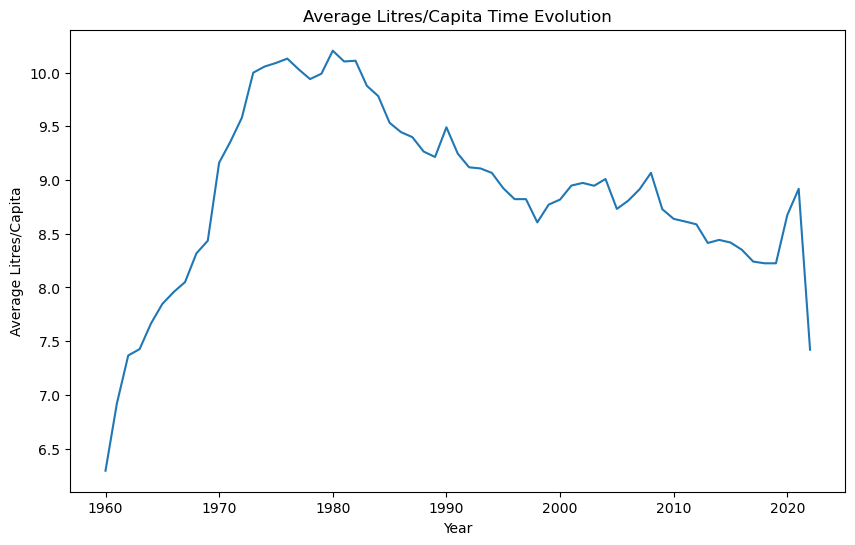

In [50]:
avg_liters_over_time = df.groupby('TIME')['LITRES/CAPITA'].mean()

# Plotting the average consumption over time
plt.figure(figsize=(10, 6))
plt.plot(avg_liters_over_time.index, avg_liters_over_time.values)
plt.xlabel('Year')
plt.ylabel('Average Litres/Capita')
plt.title('Average Litres/Capita Time Evolution')
plt.show()